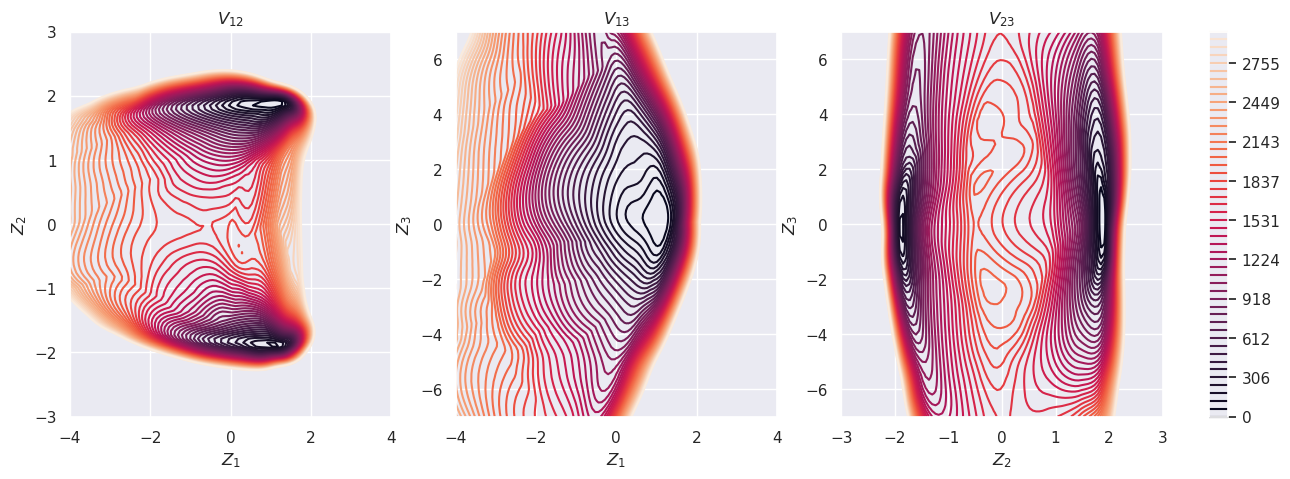

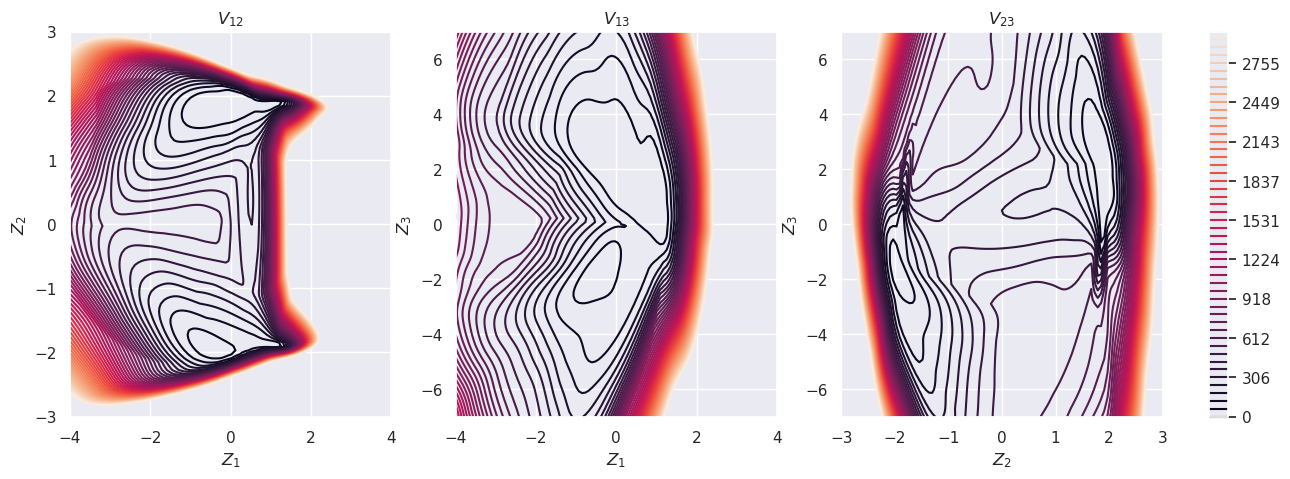

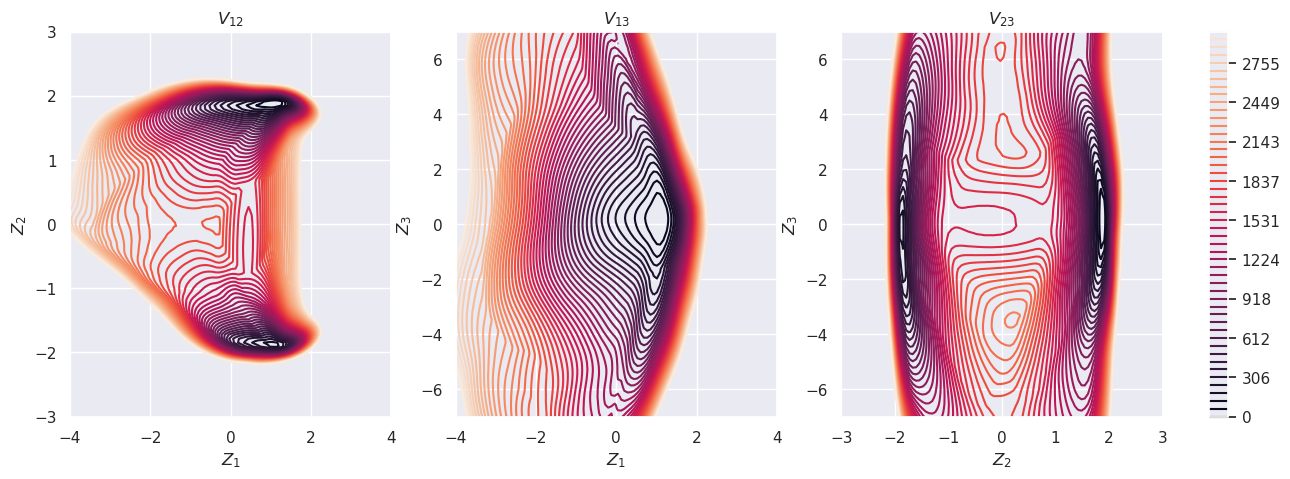

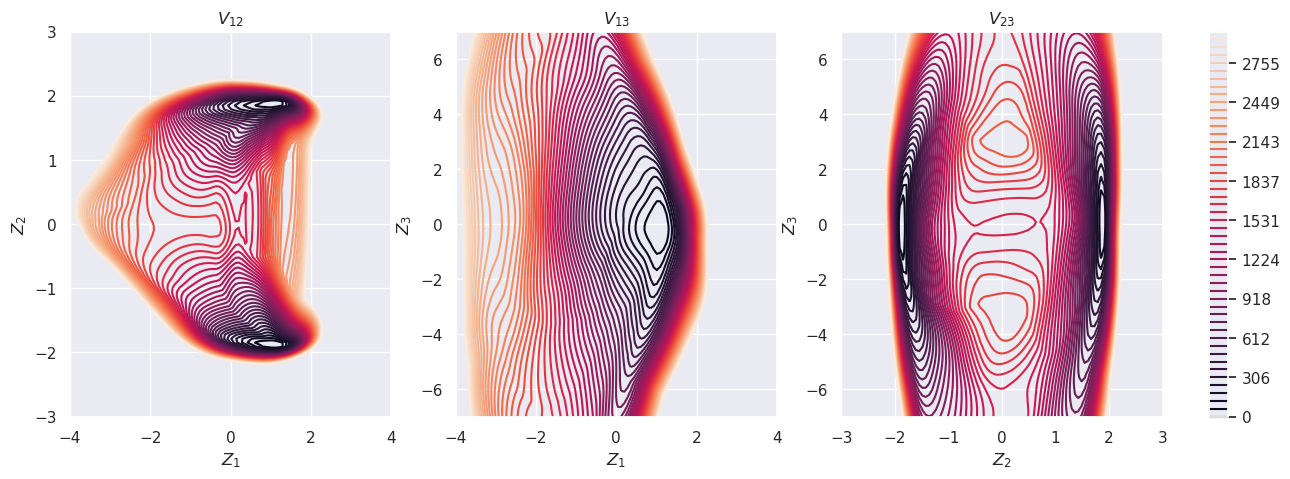

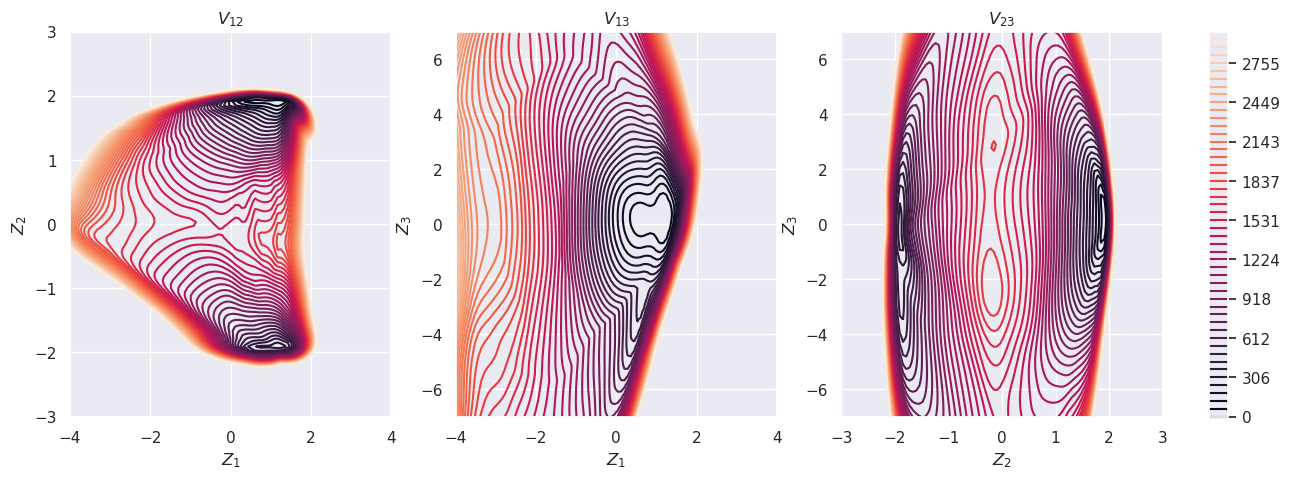

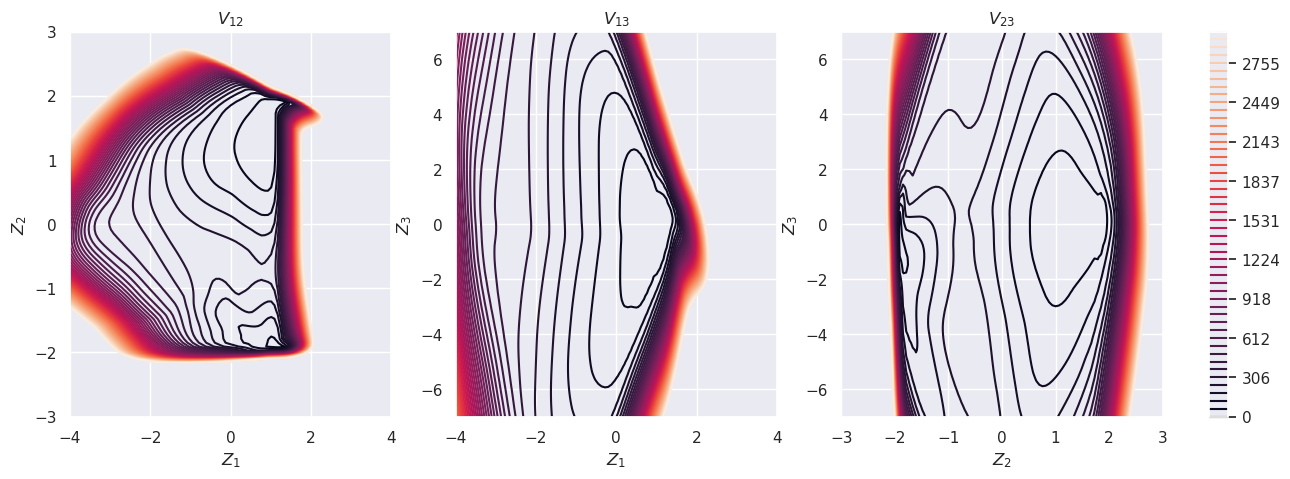

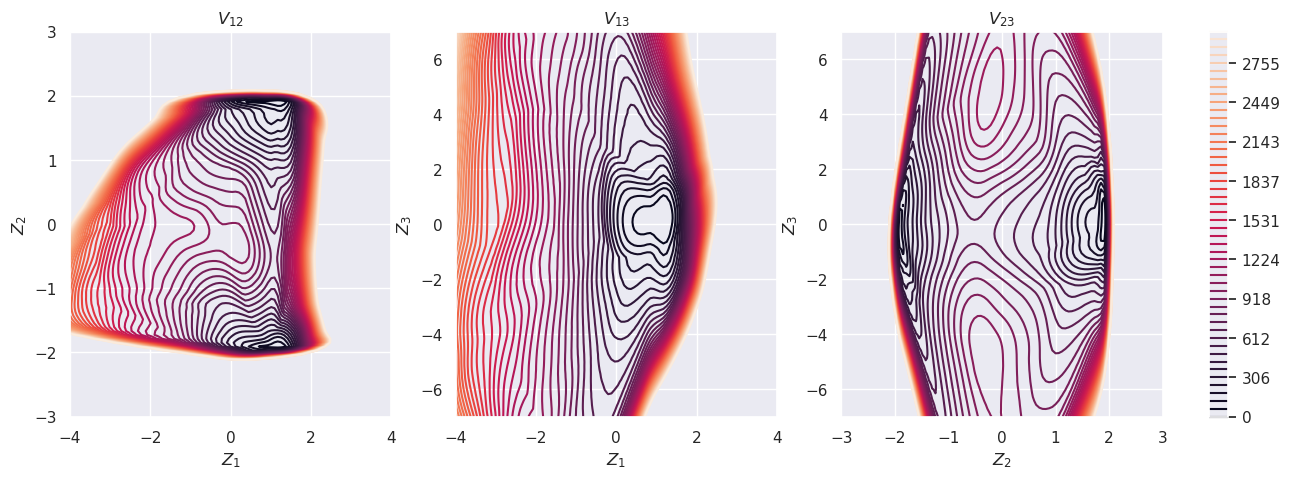

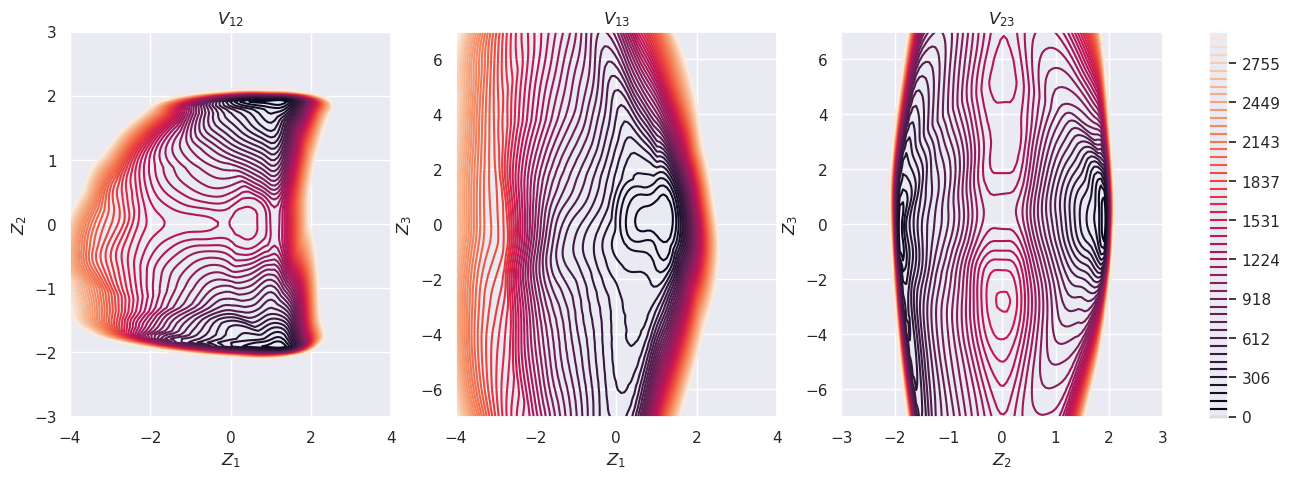

In [9]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ["XLA_PYTHON_CLIENT_ALLOCATOR"] = "platform"
import jax
import jax.numpy as jnp
import jax.random as jr
import equinox as eqx
import seaborn as sns; sns.set_theme() 
from omegaconf import OmegaConf
from utils_reduced_polymer import PlotV

import jax.numpy as jnp
from matplotlib import colors
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

from examples.utils.sde import SDEIntegrator
from utils_reduced_polymer import build_OnsagerNetHD2_scale, build_OnsagerNet, PlotV
from utils_reduced_polymer import entropy_production_polymer
 
os.makedirs("Figure", exist_ok=True)

def plot_V_dataset(data_set_key, level_end):
    for seed in [0,1, 12, 123]:
        path =  f"outputs/main{seed}_HD2"
        config = OmegaConf.load(os.path.join(path, ".hydra/config.yaml"))
        model_template = build_OnsagerNetHD2_scale(config) 
        net = eqx.tree_deserialise_leaves(os.path.join(path,data_set_key + '/model.eqx'), model_template) 
        fig, ax = PlotV(net, config, level_end)
        fig.savefig(os.path.join("Figure", f"seed_{seed}_" + data_set_key + '.pdf'), dpi=300, bbox_inches='tight')


# plot_V_dataset(data_set_key = "F23_10_T10", level_end=2000)
# plot_V_dataset(data_set_key = "F23_10_T5", level_end=2000)
# plot_V_dataset(data_set_key = "F23_10_T2_25", level_end=2000)
plot_V_dataset(data_set_key = "F23_10_T0_5", level_end=3000)
plot_V_dataset(data_set_key = "F23_10_T0_25", level_end=3000)

# plot_V_dataset(data_set_key = "F3_93_T1", level_end=300)
# plot_V_dataset(data_set_key = "F2_78_T1", level_end=250)
# plot_V_dataset(data_set_key = "F2_31_T1", level_end=150)

# plot_V_dataset(data_set_key = "F1_62_T1", level_end=80)







In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ["XLA_PYTHON_CLIENT_ALLOCATOR"] = "platform"
import jax
import jax.numpy as jnp
import jax.random as jr
import equinox as eqx
import seaborn as sns; sns.set_theme() 
from omegaconf import OmegaConf
from utils_reduced_polymer import PlotV

import jax.numpy as jnp
from matplotlib import colors
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

from examples.utils.sde import SDEIntegrator
from utils_reduced_polymer import build_OnsagerNetHD2_scale, build_OnsagerNet, PlotV
from utils_reduced_polymer import entropy_production_polymer

data_set_key_list=["F23_10_T0_25", "F23_10_T0_5",  "F23_10_T2_25", "F23_10_T5", "F23_10_T10", 
                  ]
temperature_list = [0.25, 0.5, 2.25, 5, 10]
ep_dict = {'F23_10_T1': jnp.array([111.57389, 117.29222, 107.65188, 112.99871])}
for k, data_set_key in enumerate(data_set_key_list):
    ep_list=[]
    for seed in [0,1, 12, 123]:
        path =  f"outputs/main{seed}_HD2"
        config = OmegaConf.load(os.path.join(path, ".hydra/config.yaml"))
        model_template = build_OnsagerNetHD2_scale(config) 
        net = eqx.tree_deserialise_leaves(os.path.join(path,data_set_key + '/model.eqx'), model_template)  
        ep, _ = entropy_production_polymer(net, temperature=temperature_list[k], end_time=5, dt = 0.0001)
        print(ep)
        ep_list.append(ep)
    ep_array = jnp.array(ep_list)
    ep_dict[data_set_key] = ep_array




/home/aiqing/anaconda3/envs/jax/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-04-09 11:31:24.033831: W external/xla/xla/service/gpu/nvptx_compiler.cc:836] The NVIDIA driver's CUDA version is 12.7 which is older than the PTX compiler version (12.8.61). Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


31.141968
935.4849
13.679794
15.738803
21.698565
1497.9406
31.649033
59.643543
380.6058
373.7652
339.4163
419.59827
1125.2449
1144.0336
1123.7941
1123.3312
2846.8628
16430.166
2842.385
2855.383


In [ ]:
print(ep_dict) 
ep_dict['F23_10_T1']=jnp.array([79.88345, 84.862236, 78.88184, 84.64799])
print(_.shape)

{'F23_10_T1': Array([111.57389, 117.29222, 107.65188, 112.99871], dtype=float32), 'F23_10_T0_25': Array([ 31.141968, 935.4849  ,  13.679794,  15.738803], dtype=float32), 'F23_10_T0_5': Array([  21.698565, 1497.9406  ,   31.649033,   59.643543], dtype=float32), 'F23_10_T2_25': Array([380.6058 , 373.7652 , 339.4163 , 419.59827], dtype=float32), 'F23_10_T5': Array([1125.2449, 1144.0336, 1123.7941, 1123.3312], dtype=float32), 'F23_10_T10': Array([ 2846.8628, 16430.166 ,  2842.385 ,  2855.383 ], dtype=float32)}
(1000, 10000, 3)


In [7]:
ep_dict = {'F23_10_T1': jnp.array([79.88345, 84.862236, 78.88184, 84.64799]),
            'F23_10_T0_25': jnp.array([ 31.141968, 935.4849  ,  13.679794,  15.738803]),
            'F23_10_T0_5': jnp.array([  21.698565, 1497.9406  ,   31.649033,   59.643543]),
            'F23_10_T2_25': jnp.array([380.6058 , 373.7652 , 339.4163 , 419.59827]),
             'F23_10_T5': jnp.array([1125.2449, 1144.0336, 1123.7941, 1123.3312]), 
             'F23_10_T10': jnp.array([ 2846.8628, 16430.166 ,  2842.385 ,  2855.383 ])}

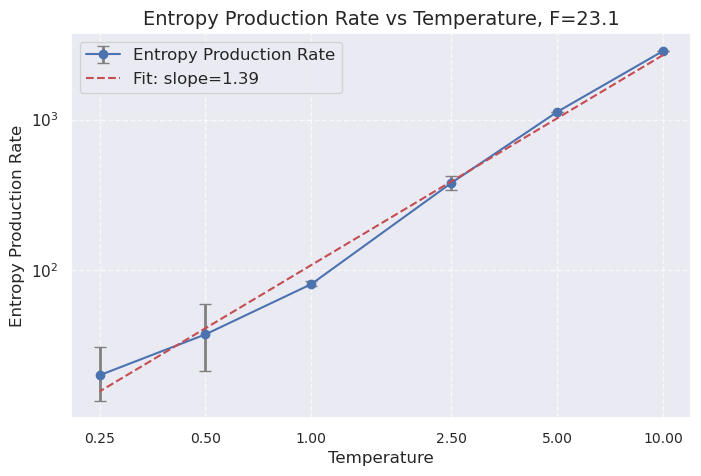

In [8]:
key_order=["F23_10_T10", "F23_10_T5","F23_10_T2_25", "F23_10_T1", "F23_10_T0_5", "F23_10_T0_25"]
ep_array = jnp.array([ep_dict[key] for key in key_order])[:, [0, 2,3]]
ep_key_list = list(ep_dict.keys())

scale_list=[10, 5.,2.5,1.,0.5,0.25]

ep_mean = ep_array.mean(axis=1)
max_value = ep_array.max(axis=1)
min_value = ep_array.min(axis=1)
yerr = jnp.vstack((ep_mean - min_value, max_value - ep_mean))

plt.figure(figsize=(8, 5))
# plt.plot(scale_list, ep_mean, marker='o', linestyle='-', color='b', label='Entropy Production Rate')
plt.errorbar(scale_list, ep_mean, yerr=yerr, fmt='o-', color='b', ecolor='gray', elinewidth=2, capsize=4, label='Entropy Production Rate')
#
# 线性拟合
log_scale_list = jnp.log10(jnp.array(scale_list))
log_ep_mean = jnp.log10(ep_mean)
coefficients = jnp.polyfit(log_scale_list, log_ep_mean, 1)
slope, intercept = coefficients
fit_line = 10**(slope * jnp.log10(jnp.array(scale_list)) + intercept)

plt.plot(scale_list, fit_line, linestyle='--', color='r', label=f'Fit: slope={slope:.2f}', zorder=5) 


plt.xscale('log')
plt.yscale('log')

# 设置横轴刻度标签
plt.xticks(scale_list, [f'{x:.2f}' for x in scale_list], fontsize=10)

# 添加标题和标签
plt.title('Entropy Production Rate vs Temperature, F=23.1', fontsize=14)
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Entropy Production Rate', fontsize=12)

# 添加网格和图例
plt.grid(True, linestyle='--', alpha=0.7) 
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]  # 调整顺序，0 表示 'Entropy Production Rate'，1 表示 'Fit'
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], fontsize=12) 
plt.savefig("Figure/entropy_production_rate_vs_Temperature_F23_10.pdf", dpi=300, bbox_inches='tight')


In [ ]:
# 计算最大值、最小值和均值
max_value = ep_array.max(axis=1)
min_value = ep_array.min(axis=1)
ep_mean = ep_array.mean(axis=1)

# 计算误差棒的上下界
yerr = jnp.vstack((ep_mean - min_value, max_value - ep_mean))

# 绘制误差棒图
plt.figure(figsize=(8, 6))
plt.errorbar(scale_list, ep_mean, yerr=yerr, fmt='o-', color='b', ecolor='gray', elinewidth=2, capsize=4, label='Entropy Production Rate')

# 设置对数刻度
plt.xscale('log')
plt.yscale('log')

# 绘制拟合直线
fit_line = 10**(slope * jnp.log10(jnp.array([2., 23.])) + intercept)
plt.plot([2., 23.], fit_line, linestyle='--', color='r', label=f'Fit: slope={slope:.2f}')

# 添加标题和标签
plt.title('Entropy Production Rate with Error Bars', fontsize=14)
plt.xlabel('Force', fontsize=12)
plt.ylabel('Entropy Production Rate', fontsize=12)

# 添加网格
plt.grid(True, linestyle='--', alpha=0.7)

# 调整图例顺序
handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 1]  # 调整顺序，0 表示 'Entropy Production Rate'，1 表示 'Fit'
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], fontsize=12)

# 显示图形
plt.show()


In [ ]:
# 绘制图形
plt.figure(figsize=(8, 6))
plt.plot(scale_list, ep_mean, marker='o', linestyle='-', color='b', label='Entropy Production')

# 设置对数刻度
plt.xscale('log')

# 设置对数刻度
plt.yscale('log')

#
log_scale_list = jnp.log10(scale_list)
log_ep_mean = jnp.log10(ep_mean)

# 线性拟合
coefficients = jnp.polyfit(log_scale_list, log_ep_mean, 1)
slope, intercept = coefficients

# 绘制拟合直线
fit_line = 10**(slope * log_scale_list + intercept)
plt.plot(scale_list, fit_line, linestyle='--', color='r', label=f'Fit: slope={slope:.2f}')

# 设置横轴刻度标签
plt.xticks(scale_list, [f'{x:.2f}' for x in scale_list], fontsize=10)

# 添加标题和标签
plt.title('Entropy Production vs Scale (Log Scale)', fontsize=14)
plt.xlabel('Scale (log)', fontsize=12)
plt.ylabel('Entropy Production (log)', fontsize=12)

# 添加网格和图例
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# 显示图形
plt.show()
